In [2]:
import requests
page=requests.get('https://sports.ndtv.com/indian-premier-league-2017/auction#overview')


In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser') 
#print(soup.prettify())

In [4]:
rt=soup.find('table',class_='latest-rank')
rt
pname=[]
pstatus=[]
pbase=[]
pauction=[]

for row in rt.findAll('tr'):
    if(row.findAll('td',class_='playername')):
        name=row.findAll('td',class_='playername')
        pname.append(name[0].get_text().strip())
    #if(status=row.findAll('td',class_='auctionstatus')
    if(row.findAll('td',class_='auctionstatus')):
        status=row.findAll('td',class_='auctionstatus')
        pstatus.append(status[0].get_text().strip())
    if(row.findAll('td',class_='baseprice')):
        base=row.findAll('td',class_='baseprice')
        pbase.append(float(base[0].get_text().strip().replace(',','')))
    if(row.findAll('td',class_='auctionprice')):
        auction=row.findAll('td',class_='auctionprice')
        pauction.append(auction[0].get_text().strip())

In [5]:
import pandas as pd
df=pd.DataFrame(pname,columns=["Player Name"])
df['Base Price']=pbase
df['Auction Price']=pauction
df['Status']=pstatus
df=df.sort_values('Base Price')
df

,Player Name,Base Price,Auction Price,Status
0,Ritwik Roy Chowdhury,1000000.0,-,To Be Auctioned
123,Rohan Prem,1000000.0,-,To Be Auctioned
126,Saurabh Dubey,1000000.0,-,To Be Auctioned
127,Dasari Swaroop Kumar,1000000.0,-,To Be Auctioned
129,Amitoze Singh,1000000.0,-,To Be Auctioned
139,T Natarajan,1000000.0,"3,00,00,000",Sold
145,Krishnappa Gowtham,1000000.0,"2,00,00,000",Sold
146,Aniket Choudhary,1000000.0,"2,00,00,000",Sold
119,Kumar Deobrat,1000000.0,-,To Be Auctioned
147,Murugan Ashwin,1000000.0,"1,00,00,000",Sold


In [6]:
import requests

page1 = requests.get("https://www.iplt20.com/stats/2017/player-points")
page1

<Response [200]>

In [7]:
from bs4 import BeautifulSoup
soup1 = BeautifulSoup(page1.content, 'html.parser')
#print(soup1.prettify())

In [8]:
#soup1.find_all(class_='top-players')
sb=[]
#sb1=[]
#name=row.findAll('a')lname=row.findAll('span',class_='top-players__last-name')
fours=[]
sixes=[]
wickets=[]
for i in range(0,161):
    sb.append(float(soup1.find_all('td',class_='top-players__pts top-players__padded is-active')[i].get_text().lstrip().rstrip()))
print(len(sb))
for i in range(0,161):
    sixes.append(int(soup1.find_all('td',class_='top-players__6s')[i].get_text().lstrip().rstrip()))
    fours.append(int(soup1.find_all('td',class_='top-players__4s')[i].get_text().lstrip().rstrip()))
    wickets.append(int(soup1.find_all('td',class_='top-players__4s')[i].get_text().lstrip().rstrip()))
print(len(fours))

161
161


In [9]:
table=soup1.find('table',class_='top-players')
sb1=[]
for row in table.find_all('tr'):
    name=row.findAll('a')
    if len(name)==1:
        sb1.append((name[0].get_text().strip().replace(' ','').replace('\n',' ')))
    else:
        if row.findAll('div',class_='top-players__player-name'):
            name1=row.findAll('div',class_='top-players__player-name')
            sb1.append((name1[0].get_text().strip().replace(' ','').replace('\n',' ')))
len(sb1)

161

In [10]:
import pandas as pd1
df1=pd1.DataFrame(sb,columns=['points'])
df1['Player Name']=sb1
df1['4s']=fours
df1['6s']=sixes
df1['Wkts']=wickets
df1

,points,Player Name,4s,6s,Wkts
0,298.0,Sunil Narine,34,10,34
1,273.5,David Warner,63,26,63
2,270.0,Ben Stokes,22,15,22
3,225.5,Jaydev Unadkat,0,0,0
4,218.5,Glenn Maxwell,19,26,19
5,218.0,Axar Patel,11,11,11
6,218.0,Bhuvneshwar Kumar,0,0,0
7,202.5,Jasprit Bumrah,0,1,0
8,201.0,Robin Uthappa,36,21,36
9,197.5,Krunal Pandya,24,7,24


In [18]:
df3=pd1.merge(df,df1,on='Player Name',how='outer')
#df3[df3['Player Name']=='Sunil Narine']
df3=df3.sort_values('points',ascending=False)
df3=df3.reset_index(drop=True)
df3
df3.count()

Player Name      397
Base Price       284
Auction Price    284
Status           284
points           161
4s               161
6s               161
Wkts             161
dtype: int64

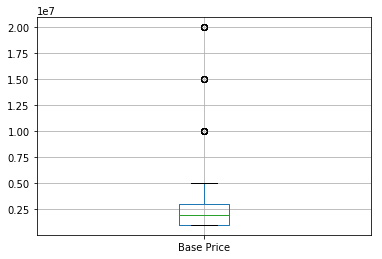

In [17]:
df3.boxplot('Base Price')
import matplotlib.pyplot as plt
plt.show()